In [17]:
import sys
import os

# Get the parent directory path
parent_dir = os.path.dirname(os.path.dirname(os.path.abspath(os.getcwd())))

# Append the parent directory to sys.path
sys.path.append(parent_dir)


# Get the directory path of the current script
current_dir = os.path.dirname(os.path.abspath(os.getcwd()))

# Set the current working directory to the script's directory
os.chdir(current_dir)

In [18]:
from utils import open_nea_table, download_nea_table
from mass_year import mass_vs_year_plot, planet_discovery_stat


If needed to update the NEA table then first run  "download_nea_table"

In [19]:
import pandas as pd
import numpy as np
import os
from datetime import date
import math

In [20]:
nea_full_table = open_nea_table()
nea_full_table.head(3)

c:\Users\adbva\OneDrive\codes_for_presentations\exoplanet_visualization\ExoPLots\utils.py:52: DtypeWarning: Columns (65,187) have mixed types. Specify dtype option on import or set low_memory=False.
  nea_full_table = pd.read_csv(table_directory)


,pl_name,pl_letter,hostname,hd_name,hip_name,tic_id,gaia_id,default_flag,pl_refname,sy_refname,...,sy_jmagerr1,sy_jmagerr2,sy_jmagstr,sy_hmag,sy_hmagerr1,sy_hmagerr2,sy_hmagstr,sy_kmag,sy_kmagerr1,sy_kmagerr2
0,OGLE-TR-10 b,b,OGLE-TR-10,NaN,NaN,TIC 130150682,Gaia DR2 4056443366649948160,1,<a refstr=TORRES_ET_AL__2008 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,NaN,NaN,13.692,13.314,0.121,-0.121,13.314&plusmn;0.121,12.856,NaN,NaN
1,BD-08 2823 c,c,BD-08 2823,NaN,HIP 49067,TIC 33355302,Gaia DR2 3770419611540574080,1,<a refstr=HEBRARD_ET_AL__2010 href=https://ui....,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.020,-0.020,7.96&plusmn;0.02,7.498,0.047,-0.047,7.498&plusmn;0.047,7.323,0.021,-0.021
2,HR 8799 c,c,HR 8799,HD 218396,HIP 114189,TIC 245368902,Gaia DR2 2832463659640297472,1,<a refstr=MAROIS_ET_AL__2008 href=https://ui.a...,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,...,0.027,-0.027,5.383&plusmn;0.027,5.280,0.018,-0.018,5.280&plusmn;0.018,5.240,0.018,-0.018


In [21]:
nea_full_table.columns.values

array(['pl_name', 'pl_letter', 'hostname', 'hd_name', 'hip_name',
       'tic_id', 'gaia_id', 'default_flag', 'pl_refname', 'sy_refname',
       'disc_pubdate', 'disc_year', 'discoverymethod', 'disc_locale',
       'disc_facility', 'disc_instrument', 'disc_telescope',
       'disc_refname', 'ra', 'rastr', 'dec', 'decstr', 'glon', 'glat',
       'elon', 'elat', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbperlim', 'pl_orbperstr', 'pl_orblpererr1', 'pl_orblper',
       'pl_orblpererr2', 'pl_orblperlim', 'pl_orblperstr', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim',
       'pl_orbsmaxstr', 'pl_orbincl', 'pl_orbinclerr1', 'pl_orbinclerr2',
       'pl_orbincllim', 'pl_orbinclstr', 'pl_orbtper', 'pl_orbtpererr1',
       'pl_orbtpererr2', 'pl_orbtperlim', 'pl_orbtperstr', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim',
       'pl_orbeccenstr', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2',
       'pl_eqtlim', 'pl_eqtstr', 'pl_oc

In [22]:
relevant_columns = ['pl_name', 'pl_letter', 'hostname', 'gaia_id', 'ra', 'dec', 'disc_year', 'discoverymethod',
       'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 
       'pl_orbsmax', 'pl_orbsmaxerr1','pl_orbsmaxerr2', 
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 
       'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 
       'pl_bmasse', 'pl_bmasseerr1', 'pl_bmasseerr2', 
       'pl_bmassprov', 
       'pl_msinie', 'pl_msinieerr1', 'pl_msinieerr2',
       'st_teff', 'st_met', 'st_lum', 'st_logg', 'st_age', 'st_mass', 'st_rad', 
       'ttv_flag', 'tran_flag', 'rv_flag']

In [23]:
nea_relevant = nea_full_table[relevant_columns]
nea_relevant.to_csv('nea_relevant.csv', index = False)

In [24]:
#nea_relevant[['pl_rade', 'pl_bmasse', 'disc_year', 'discoverymethod']].head(20)

R-M relation should be taken considering Teff, radius, and orbital period

In [41]:
tmp = nea_relevant[['pl_rade', 'st_teff', 'pl_bmasse', 'pl_orbper', 'st_rad']]
tmp = tmp[tmp.pl_bmasse == tmp.pl_bmasse]
tmp = tmp[tmp.pl_rade > 0]
tmp = tmp[tmp.st_teff > 0]
print (tmp)
tmp['st_rad'].isna().sum()

      pl_rade  st_teff   pl_bmasse  pl_orbper  st_rad
0      14.011   5950.0   197.04600   3.101278    1.17
7       2.800   5800.0   508.50000  12.333500    1.07
10      2.200   3900.0  1303.00000   5.901240    0.53
38     16.870   5941.0   271.74465   3.899052    1.93
39     21.633   6100.0   352.79130   2.175180    2.46
...       ...      ...         ...        ...     ...
5438    1.240   3803.0     2.14000   2.769530    0.44
5440    4.570   3600.0    13.90000   3.336650    0.55
5442   18.046   6933.0  1430.17500   2.485533    1.53
5443   11.781   6202.0   953.49000   6.180235    1.59
5449   11.321   5144.0   310.83618  11.910100    0.79

[1032 rows x 5 columns]


7

# Mass discovery year plot

In [26]:
planet_discovery_stat()

-----  Some Stats -----
5463 planets discovered so far

1088 via Transiting/TTV methods
1043 via RV method
200 via Microlensing method
64 via Imaging method
35 by other methods
-----     End     ----


c:\Users\adbva\OneDrive\codes_for_presentations\exoplanet_visualization\ExoPLots\utils.py:52: DtypeWarning: Columns (65,187) have mixed types. Specify dtype option on import or set low_memory=False.
  nea_full_table = pd.read_csv(table_directory)


FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\adbva\\OneDrive\\codes_for_presentations\\exoplanet_visualization\\ss_planet_images\\earth.png'

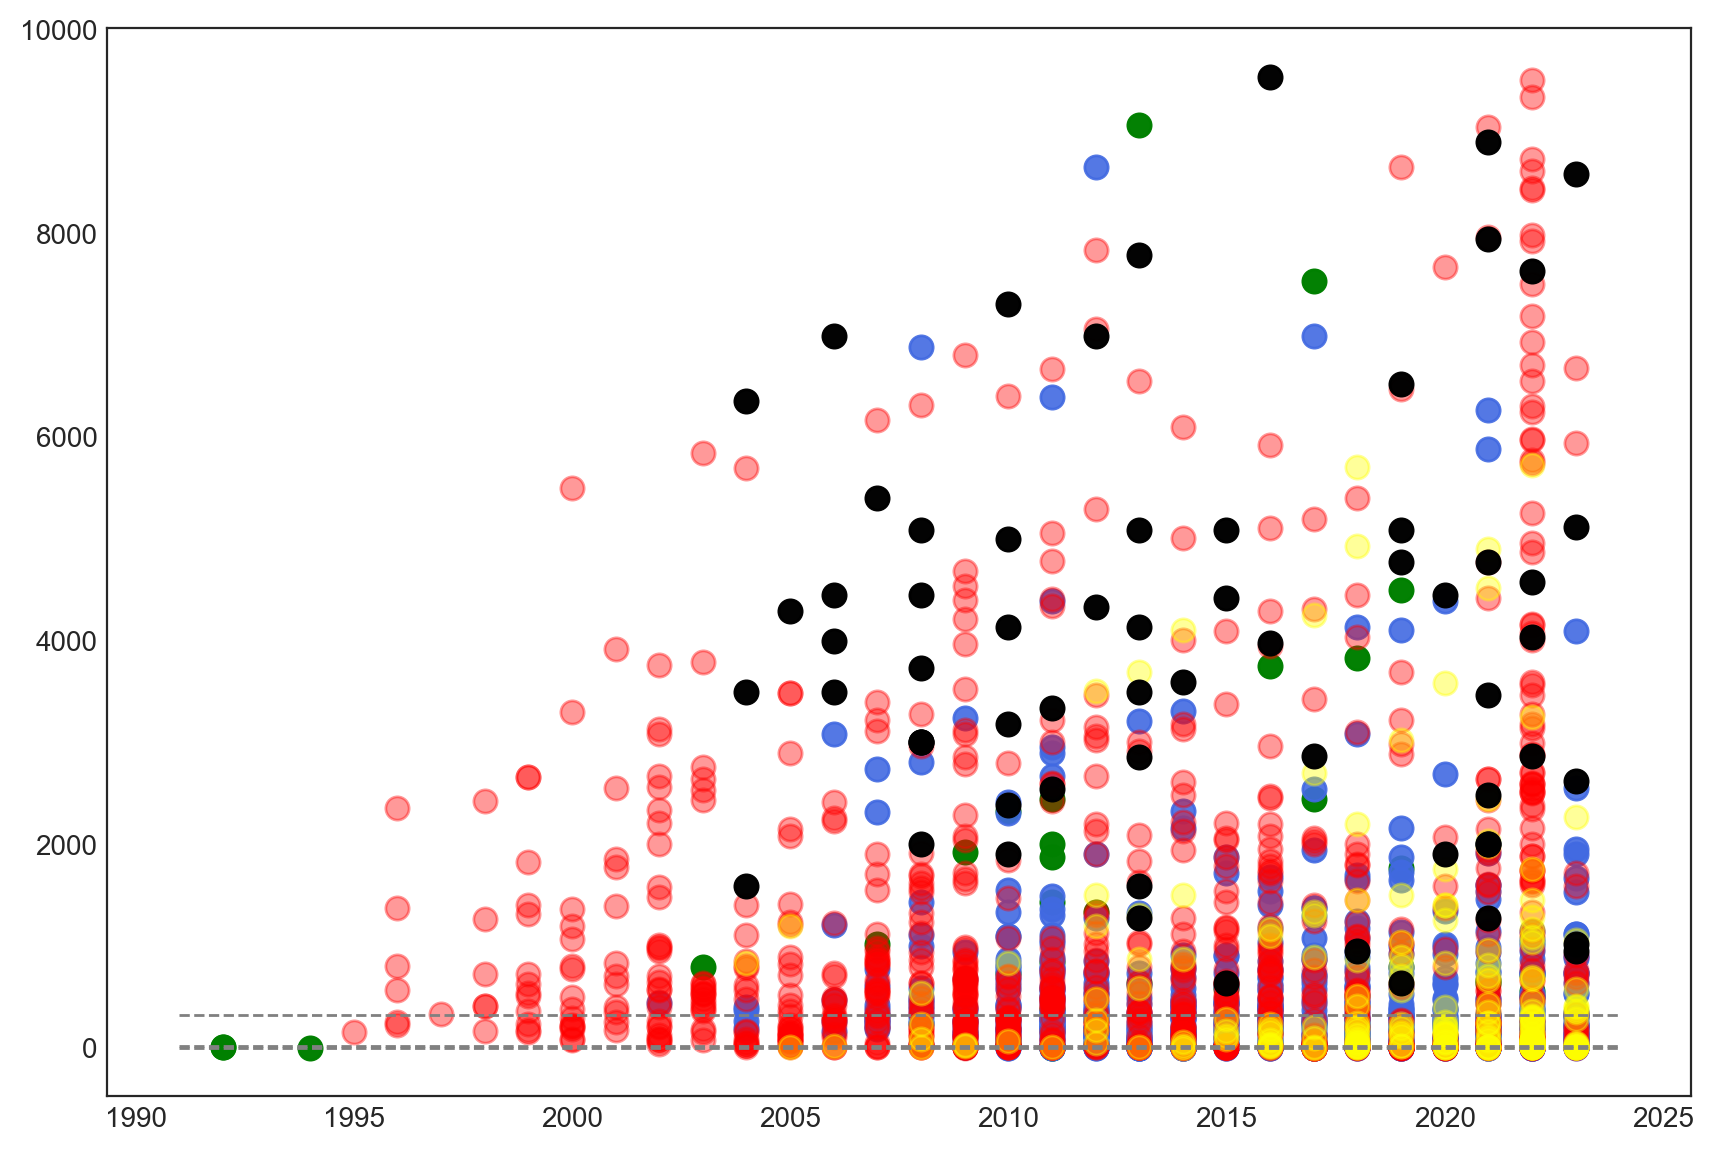

In [27]:
mass_vs_year_plot()

In [ ]:
from PIL import Image

def change_resolution(input_path, output_path, scale):
    # Open the image
    image = Image.open(input_path)

    width, height = image.size
    print (width, height)

    new_width, new_height = int(width*scale), int(height*scale)

    # Resize the image
    resized_image = image.resize((new_width, new_height), Image.ANTIALIAS)

    # Save the resized image
    resized_image.save(output_path)

# Example usage
#change_resolution('./ss_planet_images/pngaaa.com-267808.png', 'nobel.png', 0.11)
#change_resolution('./ss_planet_images/pngaaa.com-107985.png', './ss_planet_images/earth.png', 0.1)
#change_resolution('./ss_planet_images/pngaaa.com-107985.png', './ss_planet_images/earth.png', 0.1)
#change_resolution('./ss_planet_images/pngaaa.com-107985.png', './ss_planet_images/earth.png', 0.1)


The images are taken (and then resized) from pngaa.com under License of "Non-comercial Use"